In [1]:
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score,calinski_harabaz_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline  

In [2]:
import pandas as pd
from sklearn import preprocessing
df = pd.read_pickle('d2.pkl')
df.columns

Index(['town', 'county', 'state', 'FIPS', 'city_town', 'p_in_lab',
       'p_unemployed', 'p_fem_labforce', 'p_fem_employed', 'p_ch6_paremp',
       ...
       'CYCountyEQTaxRate', 'CYSchoolEQTaxRate',
       'CYLocalPurposeMunicipalEQTaxRate', 'CYTotalMunicipalEQRate',
       'CYTotalEQRate(REAPNotIncluded)', 'num_badge', 'num_train_stat',
       'management_rate', 'teacher_rate', 'developer_rate'],
      dtype='object', length=159)

In [5]:
df = df.query('p_malepop != 0')
X = df.iloc[:,5:].values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 0 to 564
Columns: 159 entries, town to developer_rate
dtypes: float64(152), int64(2), object(5)
memory usage: 706.2+ KB


In [ ]:
### select a specific set of columns to cluster on
#df2 = pd.concat([df['p_malepop'],df['p_white'], df['p_latino']], axis=1)

#df2.head()

In [6]:
#X = df.iloc[:,2:].values
#X = df2.values

X = preprocessing.scale(X)
type(X)

numpy.ndarray

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.21624174357 
The Calinski Harabasz score is : 80.9020081884


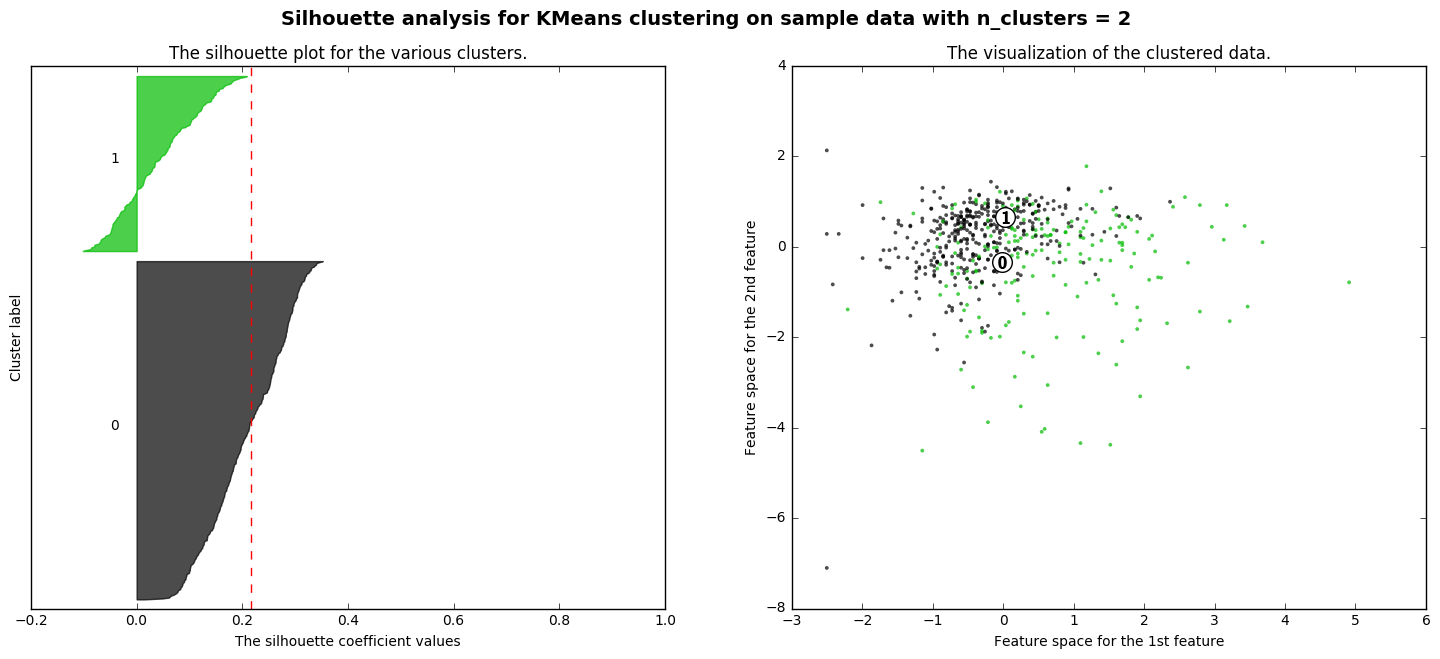

For n_clusters = 3 The average silhouette_score is : 0.149524017206 
The Calinski Harabasz score is : 66.7809168004


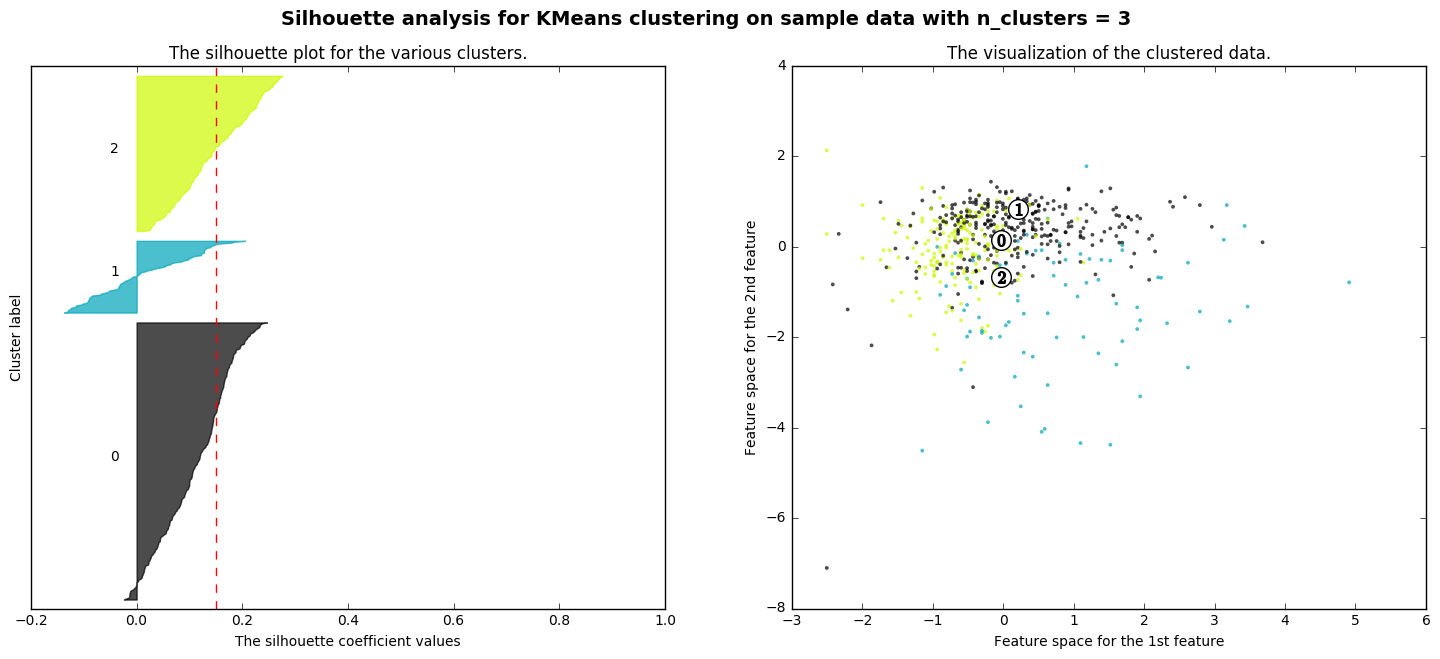

For n_clusters = 4 The average silhouette_score is : 0.139398201012 
The Calinski Harabasz score is : 56.811724985


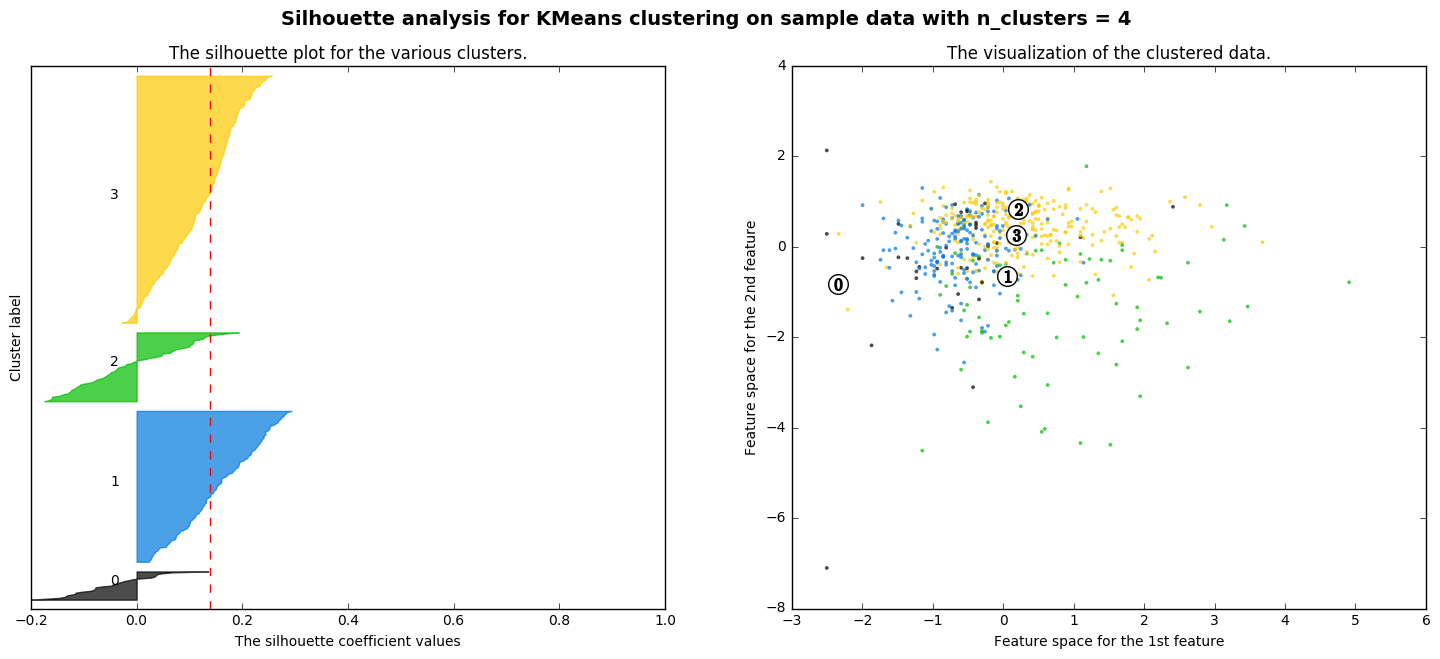

For n_clusters = 5 The average silhouette_score is : 0.106067901314 
The Calinski Harabasz score is : 49.2813950788


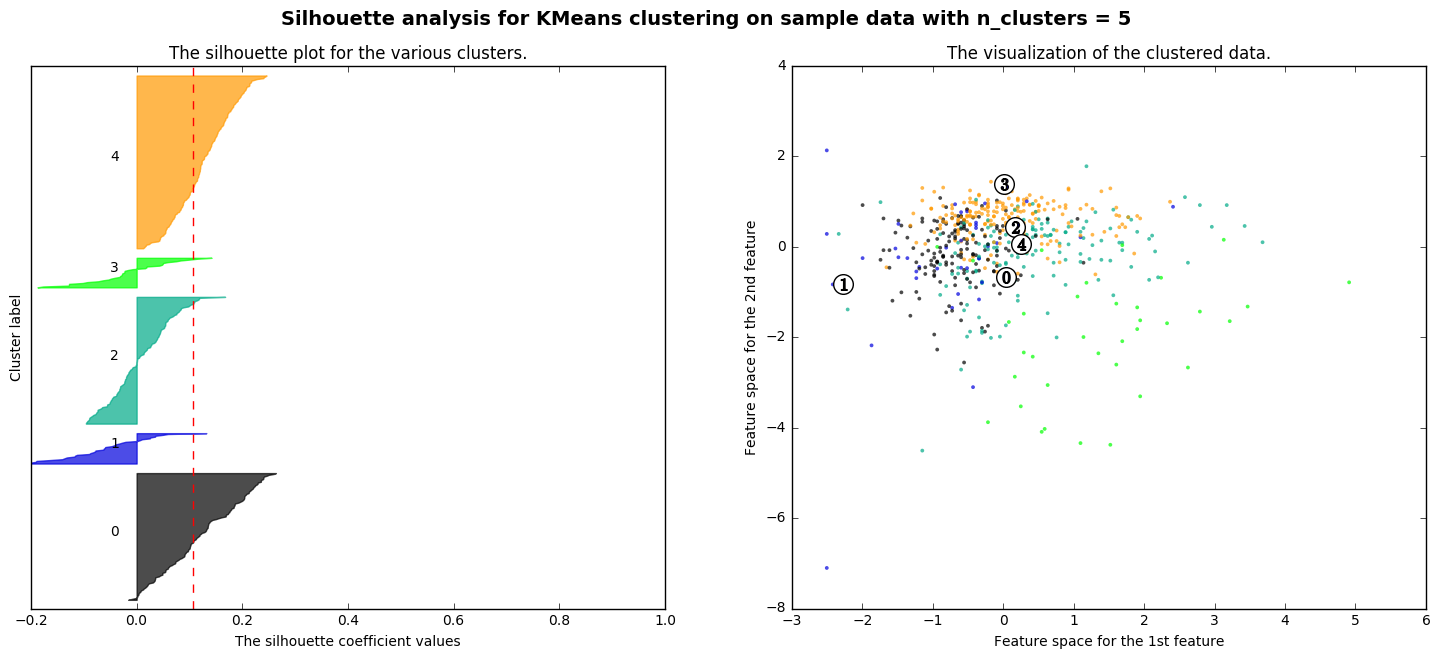

For n_clusters = 10 The average silhouette_score is : 0.0412653379046 
The Calinski Harabasz score is : 37.0636037951


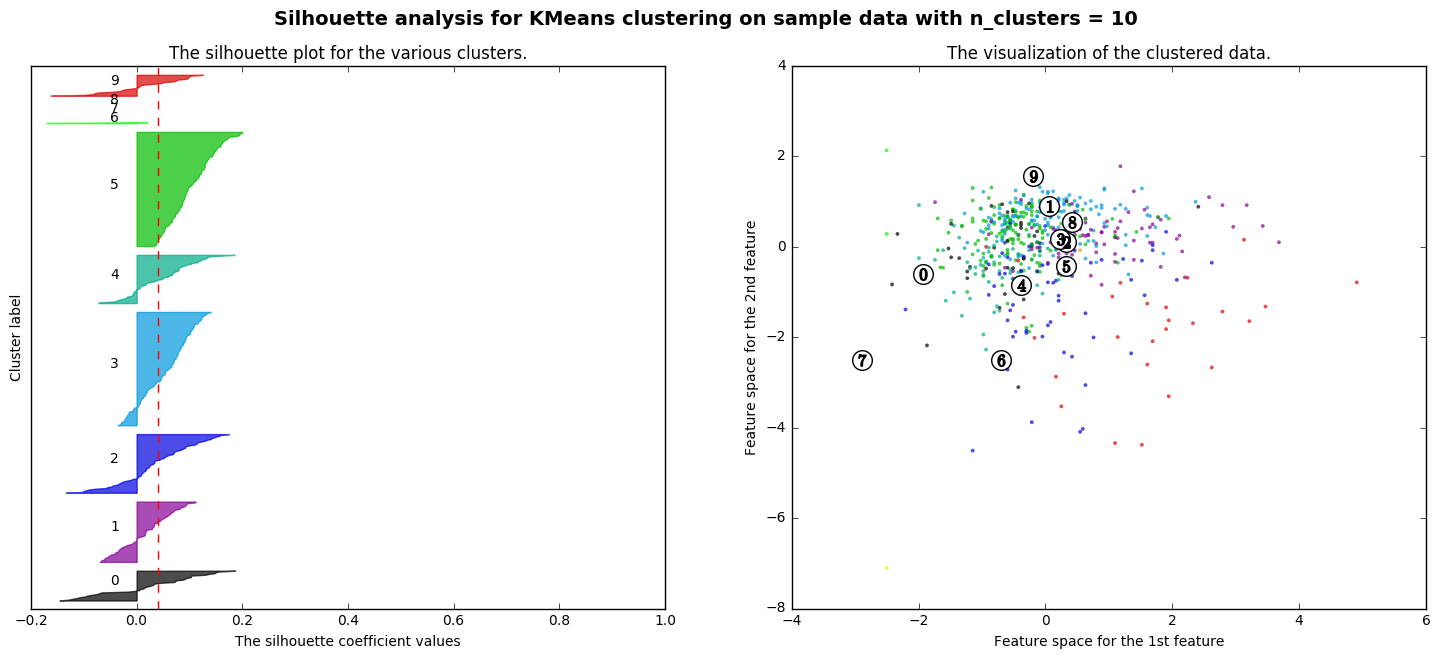

For n_clusters = 20 The average silhouette_score is : 0.00685678488906 
The Calinski Harabasz score is : 23.358907895


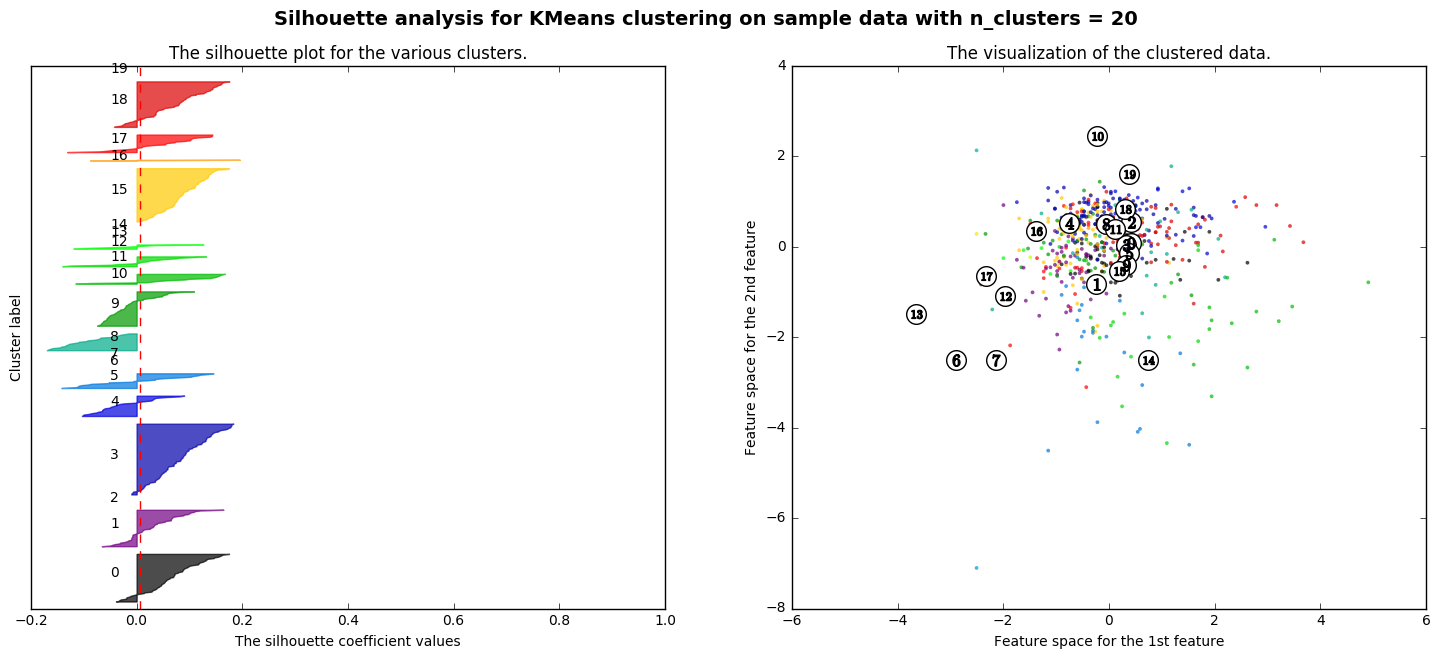

For n_clusters = 40 The average silhouette_score is : 0.0059737528129 
The Calinski Harabasz score is : 15.8293345767


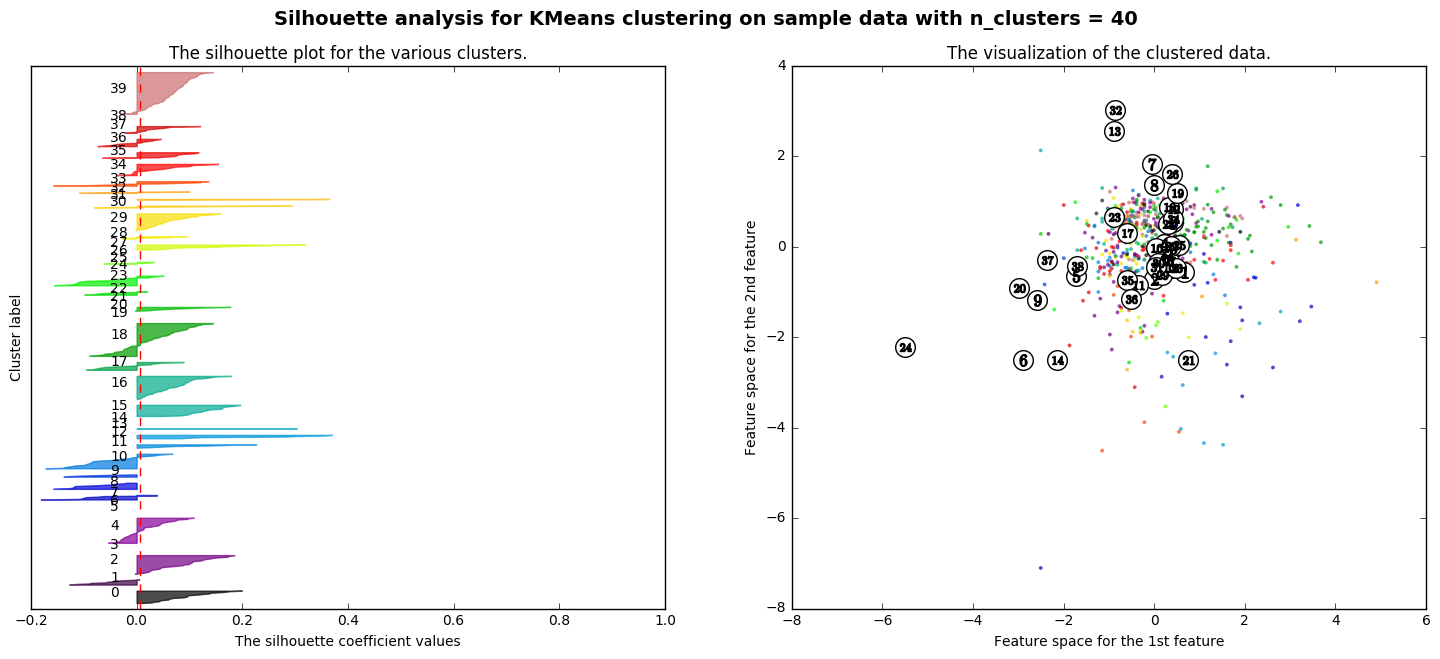

For n_clusters = 60 The average silhouette_score is : -0.0388401037442 
The Calinski Harabasz score is : 12.2982232979


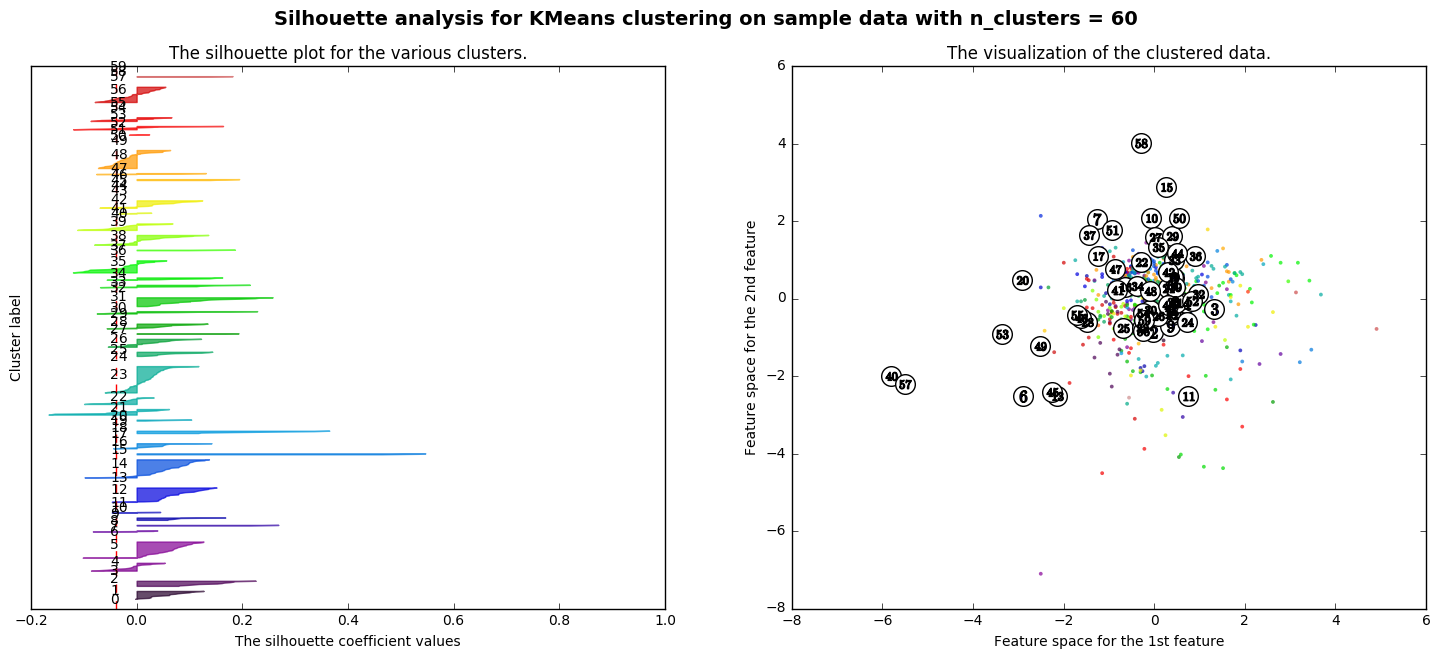

In [14]:
print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
#X, y = make_blobs(n_samples=500,
#                  n_features=2,
#                  centers=4,
#                  cluster_std=1,
#                  center_box=(-10.0, 10.0),
#                  shuffle=True,
#                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 10, 20, 40, 60]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.2, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, max_iter=1000)
    cluster_labels = clusterer.fit_predict(X)
    
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels, metric='correlation')
    ch_score = calinski_harabaz_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg,
         "\nThe Calinski Harabasz score is :", ch_score)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
       # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 1], X[:, 5], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=70)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()
    
    
    

In [13]:
for i in zip(df['town'],cluster_labels):
    print(i)

('Absecon city', 39)
('Atlantic City city', 7)
('Brigantine city', 10)
('Buena borough', 18)
('Buena Vista township', 23)
('Corbin City city', 4)
('Egg Harbor township', 39)
('Egg Harbor City city', 8)
('Estell Manor city', 4)
('Folsom borough', 4)
('Galloway township', 18)
('Hamilton township', 18)
('Hammonton town', 18)
('Linwood city', 39)
('Longport borough', 37)
('Margate City city', 37)
('Mullica township', 23)
('Northfield city', 39)
('Pleasantville city', 8)
('Port Republic city', 4)
('Somers Point city', 18)
('Ventnor City city', 8)
('Weymouth township', 23)
('Allendale borough', 2)
('Alpine borough', 35)
('Bergenfield borough', 15)
('Bogota borough', 15)
('Carlstadt borough', 15)
('Cliffside Park borough', 33)
('Closter borough', 11)
('Cresskill borough', 11)
('Demarest borough', 36)
('Dumont borough', 15)
('East Rutherford borough', 33)
('Edgewater borough', 31)
('Elmwood Park borough', 15)
('Emerson borough', 2)
('Englewood city', 33)
('Englewood Cliffs borough', 36)
('Fair